In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def plot(x, y, x_label=None, y_label=None, title=None, name_save_file=None, points=None):
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if points:
        for point in points:
            plt.scatter(*point)
    plt.plot(x, y)
    if name_save_file:
        plt.savefig(name_save_file)
    plt.grid()
    plt.show()

def calc_mutual_inductance(coil_1, coil_2, d, po=0, fi=0):
    """Расчёт взаимной индуктивности между двумя витками.
    :param coil_1: np.ndarray с радиусом одной катушки индуктивности, м
    :type coil_1: np.ndarray
    
    :param coil_2: список с радиусом одной катушки индуктивности, м
    :type coil_1: np.ndarray
    
    :param d: расстояние между витками, м
    :type d: np.ndarray or float, int
    
    :param po: латеральное смещение между витками, м
    :type po: np.ndarray or float, int
    
    :param fi: угловое смещение между витками
    :type fi: np.ndarray or float, int
    
    :rtype: np.ndarray
    :return: M, собственная индуктивность между витками
    """
    mu0 = 1.26 * 10 ** (-6)
    mutual_inductance = np.ones((len(coil_1), len(coil_2)))
    N = 180
    K = 180
    df1 = 2 * np.pi / N
    df2 = 2 * np.pi / K
    for ri in range(len(coil_1)):
        for rj in range(len(coil_2)):
            M = 0
            for n in range(N):
                for k in range(K):
                    xk_xn = po + coil_1[ri] * np.cos(df2 * k) * np.cos(fi) - coil_2[rj] * np.cos(df1 * n)
                    yk_yn = coil_1[ri] * np.sin(df2 * k) * np.cos(fi) - coil_2[rj] * np.sin(df1 * n)
                    zk_zn = d + coil_1[ri] * np.cos(df2 * k) * np.sin(fi)
                    r12 = (xk_xn ** 2 + yk_yn ** 2 + zk_zn ** 2) ** 0.5
                    M += (np.cos(df2 * k - df1 * n) * df1 * df2) / r12
            M *= mu0 * coil_1[ri] * coil_2[rj] / (4 * np.pi)
            mutual_inductance[ri][rj] = M
    return np.sum(mutual_inductance)

def calc_self_inductance(coil, thin):
    mu0 = 4 * np.pi * 10 ** (-7)
    L = np.sum(mu0 * coil * (np.log(8 * coil / thin) - 7 / 4 + (thin ** 2) / (8 * coil ** 2) * (np.log(8 * coil / thin) + 1 / 3)))
    mu0 = 1.26 * 10 ** (-6)
    mutual_inductance = np.ones((len(coil), len(coil)))
    N = 180
    K = 180
    df1 = 2 * np.pi / N
    df2 = 2 * np.pi / K
    d = 0
    po = 0
    fi = 0
    for ri in range(len(coil)):
        for rj in range(len(coil)):
            M = 0
            if ri != rj:
                for n in range(N):
                    for k in range(K):
                        xk_xn = po + coil[ri] * np.cos(df2 * k) * np.cos(fi) - coil[rj] * np.cos(df1 * n)
                        yk_yn = coil[ri] * np.sin(df2 * k) * np.cos(fi) - coil[rj] * np.sin(df1 * n)
                        zk_zn = d + coil[ri] * np.cos(df2 * k) * np.sin(fi)
                        r12 = (xk_xn ** 2 + yk_yn ** 2 + zk_zn ** 2) ** 0.5
                        M += (np.cos(df2 * k - df1 * n) * df1 * df2) / r12
                M *= mu0 * coil[ri] * coil[rj] / (4 * np.pi)
            mutual_inductance[ri][rj] = M
    M = np.sum(mutual_inductance)
    L += M
    return L

def calc_coupling_coef(L1, L2, M):
    return M / (np.sqrt(L1 * L2))

In [4]:
# катушка №1, параметры даны в метрах
coil_1 = np.array([0.028, 0.07])

# катушки, параметры даны в метрах
coils_r = np.array([0.4 * np.linspace(0.01, 0.1, 100)]).T
coils_l = np.array([np.linspace(0.01, 0.1, 100)]).T
coils = np.hstack([coils_r, coils_l])

# расстояние между катушками в метрах
d = 0.001

In [5]:
# расчёт взаимной индуктивности между катушками
M = np.array([])
for coil in coils:
    M = np.append(M, calc_mutual_inductance(coil_1, coil, d))

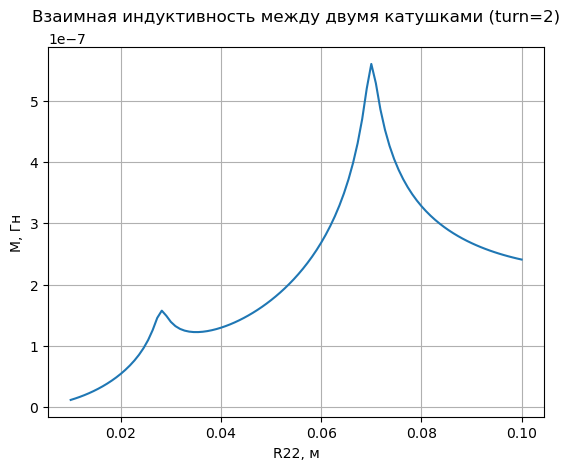

In [6]:
# вывод графика взаимной индуктивности между катушками
plot(coils_l.T[0], M, x_label="R22, м", y_label="M, Гн", title="Взаимная индуктивность между двумя катушками (turn=2)\n")

In [12]:
# расчёт собственной индуктивности для первой катушки,толщина провода r_turn = 0,001 м
L1 = calc_self_inductance(coil_1, thin=0.001)

# расчёт собственной индуктивности для катушек,толщина провода r_turn = 0,001 м
L_coils = np.array([])
for coil in coils:
    L_coils = np.append(L_coils, calc_self_inductance(coil, thin=0.001))

In [22]:
k = calc_coupling_coef(L1, L_coils, M)

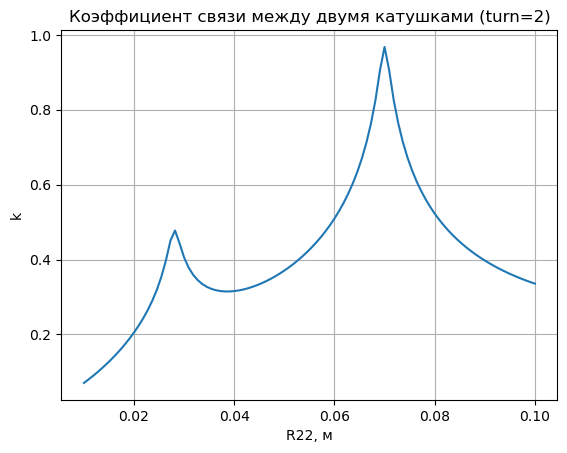

In [26]:
plot(coils_l.T[0], k, x_label="R22, м", y_label="k", title="Коэффициент связи между двумя катушками (turn=2)")